# 5: Predictive Modeling

In [3]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load Data

In [4]:
df = pd.read_csv('../data/processed/state_analysis_data.csv')

print(f"Data loaded: {len(df)} states")
print(f"Columns: {len(df.columns)}")
df.head()

Data loaded: 50 states
Columns: 24


,state,total_funding,avg_grant,median_grant,num_grants,mental_health_funding,maternal_health_funding,num_program_types,state_fips,year,...,maternal_mortality_rate,median_household_income,poverty_rate,uninsured_rate,urban_pct,mental_health_pct,maternal_health_pct,log_total_funding,funding_category,region
0,AK,17845634.0,8.497921e+05,1051991.0,21,407116.0,15324103.0,8,2,2021,...,25.6,83029.0,18.9,12.9,57.0,2.28,85.87,7.251532,Low,West
1,AL,115695593.0,4.285022e+06,1150000.0,27,395128.0,111258871.0,8,1,2021,...,17.3,59982.0,21.6,4.4,90.4,0.34,96.17,8.063317,Medium,South
2,AR,91357304.0,3.806554e+06,4076542.0,24,0.0,87948829.0,7,5,2021,...,19.4,68946.0,20.5,11.1,69.5,0.00,96.27,7.960743,Medium,South
3,AZ,118347190.0,4.226685e+06,1173276.5,28,0.0,114693447.0,7,4,2021,...,17.7,74280.0,21.2,8.4,52.2,0.00,96.91,8.073158,Medium,West
4,CA,394132863.0,4.692058e+06,300000.0,84,445000.0,369616494.0,8,6,2021,...,21.8,51241.0,16.4,16.7,94.3,0.11,93.78,8.595643,High,West


## Prepare Data for Modeling

In [5]:
feature_cols = [
    'total_funding',
    'mental_health_funding', 
    'maternal_health_funding',
    'num_grants',
    'num_program_types',
    'mental_health_pct',
    'poverty_rate',
    'uninsured_rate',
    'median_household_income'
]

target = 'infant_mortality_rate'

# Dropping rows with missing values
model_data = df[feature_cols + [target]].dropna()

print(f"Model dataset: {len(model_data)} observations")
print(f"Features: {len(feature_cols)}")

Model dataset: 50 observations
Features: 9


In [6]:
# Separate features and targets
X = model_data[feature_cols]
y = model_data[target]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (50, 9)
Target vector shape: (50,)


In [7]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} states")
print(f"Test set: {len(X_test)} states")

Training set: 40 states
Test set: 10 states


## Feature Scaling

In [8]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting back to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print("Features scaled")
print("\nScaled training data sample:")
print(X_train_scaled.head())

Features scaled

Scaled training data sample:
    total_funding  mental_health_funding  maternal_health_funding  num_grants  \
12      -0.910721              -1.327332                -0.888338   -1.134210   
4        3.303666               0.173395                 3.226880    3.535042   
37       1.386239              -1.327332                 1.424126    1.165571   
8        0.909838               0.173395                 0.953375    0.886809   
3        0.060150              -1.327332                 0.091188   -0.367616   

    num_program_types  mental_health_pct  poverty_rate  uninsured_rate  \
12          -2.883223          -0.731700     -0.687328       -1.017082   
4            0.611593          -0.611660      0.396377        1.499909   
37          -1.135815          -0.731700      0.514171        0.798056   
8            0.611593          -0.480707     -1.441210       -0.799266   
3           -1.135815          -0.731700      1.527200       -0.508844   

    median_household_i

## Model 1: Linear Regression

In [9]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print("Linear Regression Results:")
print(f"Training R²: {train_r2_lr:.3f}")
print(f"Test R²: {test_r2_lr:.3f}")
print(f"Test RMSE: {test_rmse_lr:.3f}")
print(f"Test MAE: {test_mae_lr:.3f}")

Linear Regression Results:
Training R²: 0.316
Test R²: -1.711
Test RMSE: 1.337
Test MAE: 1.004


In [10]:
# Feature coefficients
coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance (by coefficient magnitude):")
print(coefficients)


Feature Importance (by coefficient magnitude):
                   Feature  Coefficient
0            total_funding    11.464894
2  maternal_health_funding   -11.154709
3               num_grants    -0.665634
8  median_household_income    -0.538916
1    mental_health_funding    -0.511073
6             poverty_rate    -0.457603
7           uninsured_rate    -0.404861
5        mental_health_pct     0.245005
4        num_program_types     0.154446


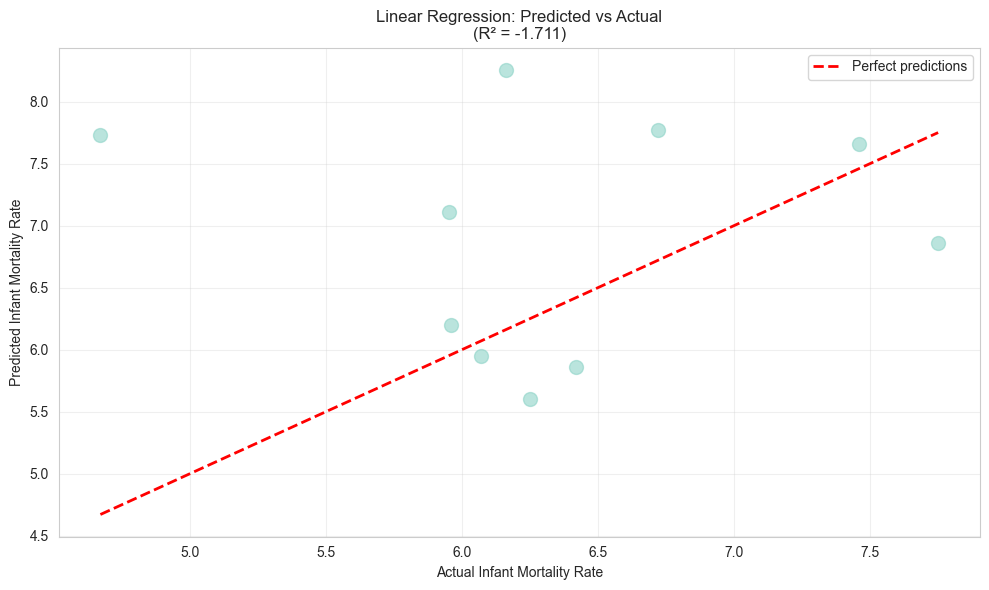

In [11]:
# Visualize predictions vs actual
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred_lr, alpha=0.6, s=100)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'r--', lw=2, label='Perfect predictions')

ax.set_xlabel('Actual Infant Mortality Rate')
ax.set_ylabel('Predicted Infant Mortality Rate')
ax.set_title(f'Linear Regression: Predicted vs Actual\n(R² = {test_r2_lr:.3f})')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/lr_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

## Model 2: Random Forest

In [12]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("Random Forest Results:")
print(f"Training R²: {train_r2_rf:.3f}")
print(f"Test R²: {test_r2_rf:.3f}")
print(f"Test RMSE: {test_rmse_rf:.3f}")
print(f"Test MAE: {test_mae_rf:.3f}")

Random Forest Results:
Training R²: 0.823
Test R²: -0.257
Test RMSE: 0.910
Test MAE: 0.706


In [13]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)


Random Forest Feature Importance:
                   Feature  Importance
6             poverty_rate    0.190328
8  median_household_income    0.179007
7           uninsured_rate    0.153541
5        mental_health_pct    0.134140
0            total_funding    0.105359
1    mental_health_funding    0.078921
2  maternal_health_funding    0.078056
3               num_grants    0.077962
4        num_program_types    0.002687


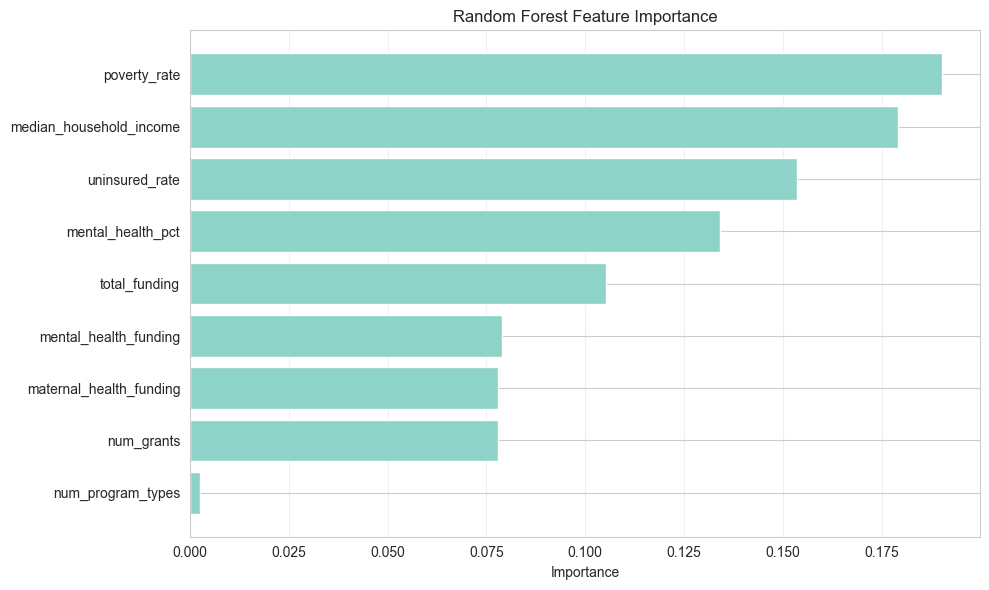

In [14]:
# Visualize feature importance
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(range(len(feature_importance)), feature_importance['Importance'].values)
ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels(feature_importance['Feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Random Forest Feature Importance')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

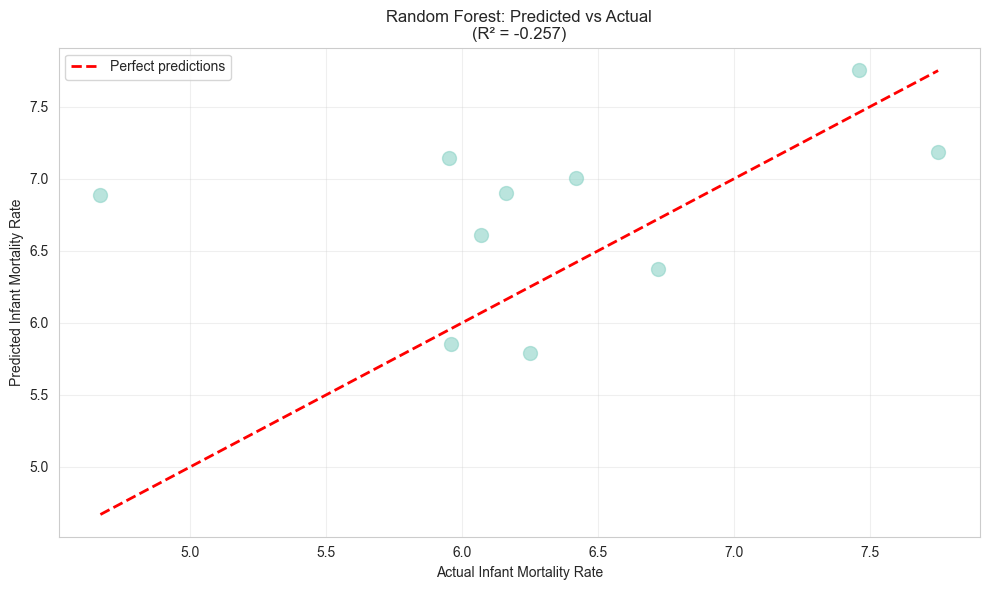

In [15]:
# Predictions vs actual for Random Forest
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred_rf, alpha=0.6, s=100)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'r--', lw=2, label='Perfect predictions')

ax.set_xlabel('Actual Infant Mortality Rate')
ax.set_ylabel('Predicted Infant Mortality Rate')
ax.set_title(f'Random Forest: Predicted vs Actual\n(R² = {test_r2_rf:.3f})')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/rf_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

## Model Comparison

In [16]:
# Compare both models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Test R²': [test_r2_lr, test_r2_rf],
    'Test RMSE': [test_rmse_lr, test_rmse_rf],
    'Test MAE': [test_mae_lr, test_mae_rf]
})

print("Model Performance Comparison:")
print(comparison.to_string(index=False))

# Determine best model
if test_r2_rf > test_r2_lr:
    print(f"\n✓ Random Forest performs better (R² improvement: {test_r2_rf - test_r2_lr:.3f})")
else:
    print(f"\n✓ Linear Regression performs better (R² improvement: {test_r2_lr - test_r2_rf:.3f})")

Model Performance Comparison:
            Model   Test R²  Test RMSE  Test MAE
Linear Regression -1.710900   1.336806  1.003538
    Random Forest -0.256842   0.910232  0.705688

✓ Random Forest performs better (R² improvement: 1.454)


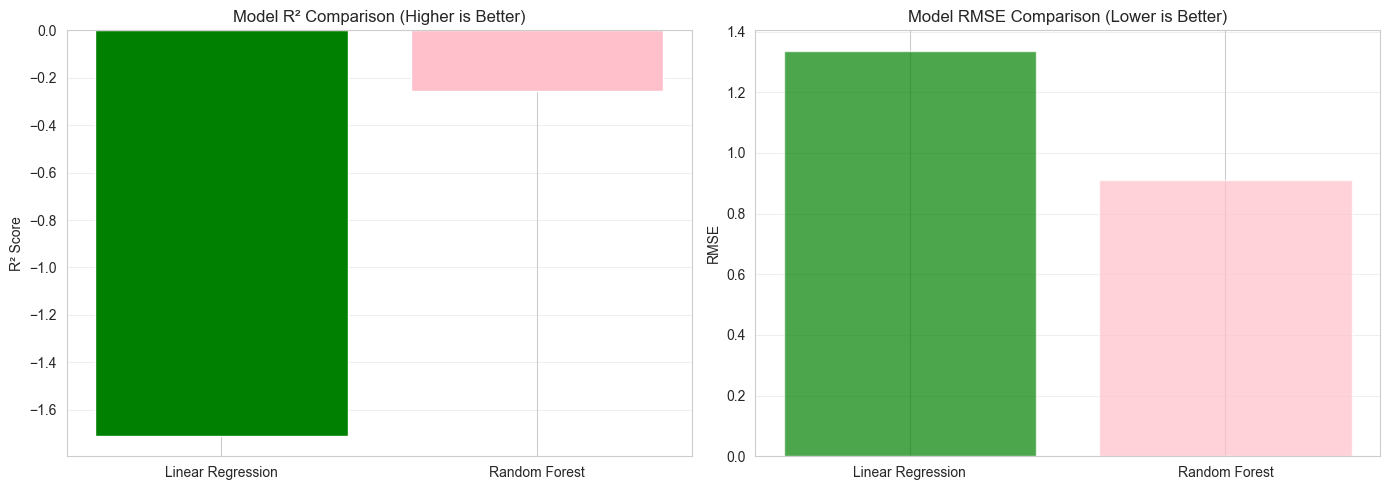

In [17]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics = ['Test R²', 'Test RMSE']
lr_scores = [test_r2_lr, test_rmse_lr]
rf_scores = [test_r2_rf, test_rmse_rf]

x = np.arange(len(metrics))
width = 0.35

# R² comparison (higher is better)
axes[0].bar(['Linear Regression', 'Random Forest'], 
            [test_r2_lr, test_r2_rf],
            color=['green', 'pink'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model R² Comparison (Higher is Better)')
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison (lower is better)
axes[1].bar(['Linear Regression', 'Random Forest'], 
            [test_rmse_lr, test_rmse_rf],
            color=['green', 'pink'], alpha=0.7)
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model RMSE Comparison (Lower is Better)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Cross-Validation

In [18]:
# 5-fold cross-validation
lr_cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, 
                                scoring='r2')
rf_cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, 
                                                       random_state=42, 
                                                       max_depth=5), 
                                X, y, cv=5, scoring='r2')

print("Cross-Validation Results (5-fold):")
print(f"\nLinear Regression:")
print(f"  Mean R²: {lr_cv_scores.mean():.3f} (+/- {lr_cv_scores.std():.3f})")
print(f"  Individual folds: {lr_cv_scores}")

print(f"\nRandom Forest:")
print(f"  Mean R²: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std():.3f})")
print(f"  Individual folds: {rf_cv_scores}")

Cross-Validation Results (5-fold):

Linear Regression:
  Mean R²: -0.602 (+/- 0.282)
  Individual folds: [-0.80861276 -1.05453018 -0.34306199 -0.45214132 -0.35406221]

Random Forest:
  Mean R²: -0.068 (+/- 0.197)
  Individual folds: [ 0.13609145  0.02249929 -0.16923538 -0.40376298  0.07466934]


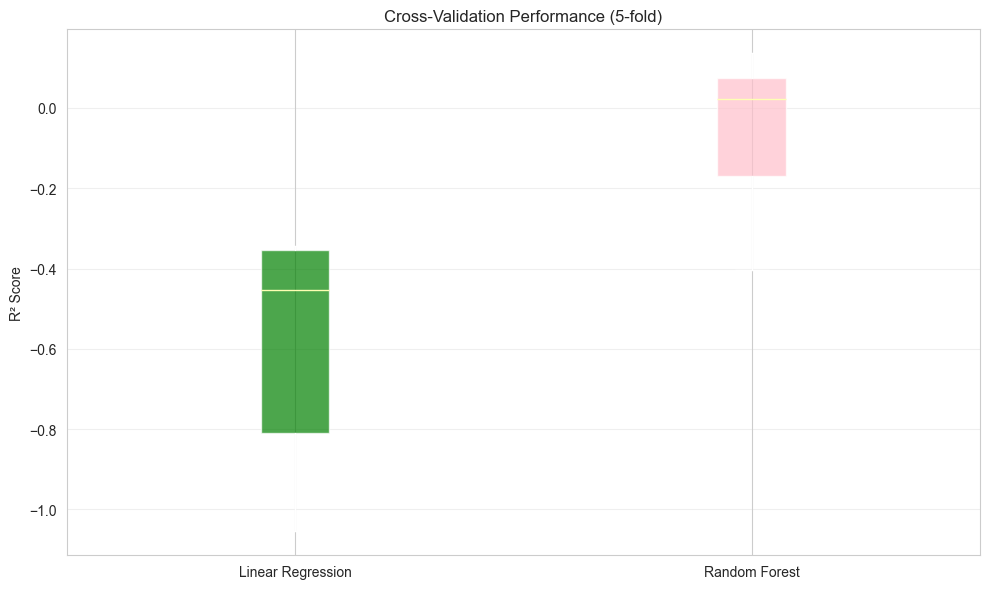

In [19]:
# Visualize CV results
fig, ax = plt.subplots(figsize=(10, 6))

box_data = [lr_cv_scores, rf_cv_scores]
bp = ax.boxplot(box_data, labels=['Linear Regression', 'Random Forest'],
                patch_artist=True)

# Color the boxes
colors = ['green', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('R² Score')
ax.set_title('Cross-Validation Performance (5-fold)')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/cv_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Residual Analysis

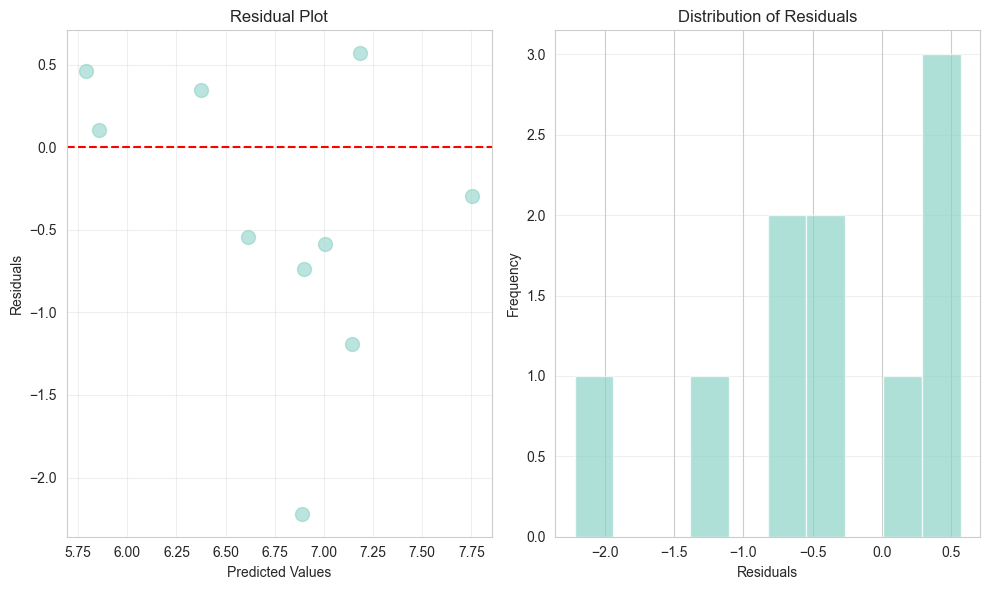

Mean residual: -0.4096 (should be close to 0)
Std of residuals: 0.8568


In [20]:
# Calculate residuals
residuals = y_test - y_test_pred_rf

fig, axes = plt.subplots(1, 2)

# Residual plot
axes[0].scatter(y_test_pred_rf, residuals, alpha=0.6, s=100)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')
axes[0].grid(alpha=0.3)

# Histogram of residuals
axes[1].hist(residuals, bins=10, alpha=0.7)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean residual: {residuals.mean():.4f} (should be close to 0)")
print(f"Std of residuals: {residuals.std():.4f}")

## Key Insights

In [22]:
print("\nMODELING SUMMARY")

print(f"\n1. Best Model: {'Random Forest' if test_r2_rf > test_r2_lr else 'Linear Regression'}")
print(f"   Test R²: {max(test_r2_rf, test_r2_lr):.3f}")
print(f"   Test RMSE: {min(test_rmse_rf, test_rmse_lr):.3f}")

print(f"\n2. Top 3 Most Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.3f}")

print(f"\n3. Model Limitations:")
print(f"   - Small dataset (~50 states)")
print(f"   - R² indicates {max(test_r2_rf, test_r2_lr)*100:.1f}% of variance explained")
print(f"   - Other factors not captured in data likely important")

print("\n")


MODELING SUMMARY

1. Best Model: Random Forest
   Test R²: -0.257
   Test RMSE: 0.910

2. Top 3 Most Important Features:
   - poverty_rate: 0.190
   - median_household_income: 0.179
   - uninsured_rate: 0.154

3. Model Limitations:
   - Small dataset (~50 states)
   - R² indicates -25.7% of variance explained
   - Other factors not captured in data likely important


